# CDS-102: Lab 7 Workbook
## Helena Gray
### March 9, 2017

In [1]:
# Run this code block to load the Tidyverse package
.libPaths(new = "~/Rlibs")
install.packages("GGally", lib = "~/Rlibs")
library(tidyverse)
library(dplyr)
library("GGally")


The downloaded source packages are in
	‘/tmp/RtmpqoMYl5/downloaded_packages’


Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [2]:
# Import the dataset
original_data <- read_csv("Brauer2008_Dataset1.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  GID = col_character(),
  YORF = col_character(),
  NAME = col_character(),
  GWEIGHT = col_integer()
)
See spec(...) for full column specifications.


In [11]:
nrow(original_data)
ncol(original_data)


[1] 5537

[1] 40

### Lab Task 1: ###

The code below splits the values in the NAME column so that each value (separated by ||) is in a separate
column and assigns the dataframe to a variable original_data_1 by way of the function separate(). The new columns are named as follows: “name”, “BP”, “MF”,
“systematic_name”, and “number”.

In [3]:
original_data_1<-separate(original_data,NAME,c("name","BP","MF","systematic_name","number"),sep="\\|\\|")

### Lab Task 2: ##

The code below removes the whitespace from the five new columns that were created using the function mutate_each() and assigns the dataframe to a variable original_data_1.

In [4]:
original_data_1<-mutate_each(original_data_1, funs(trimws), name:systematic_name)

### Lab Task 3: ###

The code below removes the GID, YORF, and GWEIGHT columns from the dataset but leave all the others. The minus sign indicates to remove the columns specified.

In [5]:
original_data_1 <- subset(original_data_1, select = -c(GID, YORF,GWEIGHT))

### Lab Task 4: ###

The code below uses the gather() function to move variable names in columns G0.05 through U0.3  into a single column. The new column holding the variable names is called “sample” and the new column holding the values underneath the G0.05 through U0.3 is called “expression”.

In [6]:
original_data_1<-gather(original_data_1,"sample","expression",G0.05:U0.3)

### Lab Task 5: ###

The code below splits the "sample" column into two columns "nutrient" and "rate" by using the separate() function.

In [7]:
original_data_1<-separate(original_data_1,sample,c("nutrient","rate"),sep=1,convert=TRUE)

### Lab Task 6: ###

The code below applies a filter() to only look at the rows with a name of
“LEU1” in the dataset.


In [8]:
leucine<-filter(original_data_1, name == "LEU1")

 A line plot is created using ggplot2. The rate is shown on the horizontal axis,
expression on the vertical, and the separate nutrients plotted as different colors.

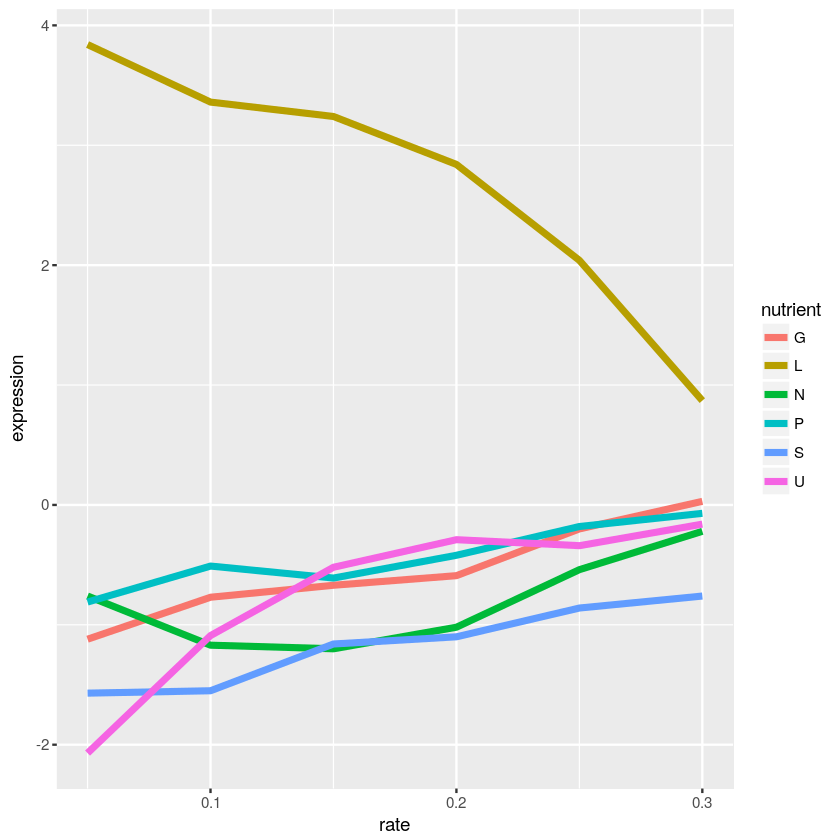

In [12]:
enzyme.plot<-ggplot(data=leucine,aes(rate, expression, colour=nutrient)) + geom_line(lwd=1.5)
ggsave("enzymePlot.png", plot = enzyme.plot, device="png", scale=1, width=5, height=4)
enzyme.plot


Look closely at that! LEU1 is highly expressed when starved of leucine because the cell has
to synthesize its own! And as the amount of leucine in the environment (the growth rate)
increases, the cell can worry less about synthesizing leucine, so LEU1 expression goes back
down. Consequently the cell can devote more energy into other functions, and we see other
genes’ expression very slightly raising.

In [14]:
head(original_data_1)

name BP                           MF                           
1 SFB2 ER to Golgi transport        molecular function unknown   
2      biological process unknown   molecular function unknown   
3 QRI7 proteolysis and peptidolysis metalloendopeptidase activity
4 CFT2 mRNA polyadenylylation*      RNA binding                  
5 SSO2 vesicle fusion*              t-SNARE activity             
6 PSP2 biological process unknown   molecular function unknown   
  systematic_name number   nutrient rate expression
1 YNL049C          1082129 G        0.05 -0.24     
2 YNL095C          1086222 G        0.05  0.28     
3 YDL104C          1085955 G        0.05 -0.02     
4 YLR115W          1081958 G        0.05 -0.33     
5 YMR183C          1081214 G        0.05  0.05     
6 YML017W          1083036 G        0.05 -0.69

In [15]:
head(original_data)

GID       YORF      
1 GENE1331X A_06_P5820
2 GENE4924X A_06_P5866
3 GENE4690X A_06_P1834
4 GENE1177X A_06_P4928
5 GENE511X  A_06_P5620
6 GENE2133X A_06_P5307
  NAME                                                                                             
1 SFB2       || ER to Golgi transport || molecular function unknown || YNL049C || 1082129          
2 || biological process unknown || molecular function unknown || YNL095C || 1086222                
3 QRI7       || proteolysis and peptidolysis || metalloendopeptidase activity || YDL104C || 1085955
4 CFT2       || mRNA polyadenylylation* || RNA binding || YLR115W || 1081958                       
5 SSO2       || vesicle fusion* || t-SNARE activity || YMR183C || 1081214                          
6 PSP2       || biological process unknown || molecular function unknown || YML017W || 1083036     
  GWEIGHT G0.05 G0.1  G0.15 G0.2  G0.25 G0.3  ⋯ L0.15 L0.2  L0.25 L0.3  U0.05
1 1       -0.24 -0.13 -0.21 -0.15 -0.05 -0.05 ⋯  0.13  0.20  0.17  0.11 -0.06
2 1        0.28  0.13 -0.40 -0.48 -0.11  0.17 ⋯  0.02  0.04  0.03  0.01 -1.02
3 1       -0.02 -0.27 -0.27 -0.02  0.24  0.25 ⋯ -0.07 -0.05 -0.13 -0.04 -0.91
4 1       -0.33 -0.41 -0.24 -0.03 -0.03  0.00 ⋯ -0.05  0.02  0.00  0.08 -0.53
5 1        0.05  0.02  0.40  0.34 -0.13 -0.14 ⋯  0.00 -0.11  0.04  0.01 -0.45
6 1       -0.69 -0.03  0.23  0.20  0.00 -0.27 ⋯  0.25 -0.21  0.12 -0.11    NA
  U0.1  U0.15 U0.2  U0.25 U0.3 
1 -0.26 -0.05 -0.28 -0.19  0.09
2 -0.91 -0.59 -0.61 -0.17  0.18
3 -0.94 -0.42 -0.36 -0.49 -0.47
4 -0.51 -0.26  0.05 -0.14 -0.01
5 -0.09 -0.13  0.02 -0.09 -0.03
6 -0.65  0.09  0.06 -0.07 -0.10